In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
fire = pd.read_csv(r"D:\Data science\Assignments docs\Neural Networks\forestfires.csv")
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


#### In the data, the month and day variables are already endoded and thier dummy columns has been added. Hence removing original 'month' and 'day column'

In [7]:
fire.drop(["month","day"], axis=1, inplace=True)

In [8]:
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
fire.shape

(517, 29)

In [10]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

## Exploratory data analysis

In [17]:
# Checking for NA values

In [18]:
fire.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

#### There are no NA values in the dataset

In [16]:
# Considering only the numerical columns neglecting dummy variable columns

In [15]:
num_values = fire[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

### Univariate analysis

In [12]:
# plotting the histograms to check the distribution of data

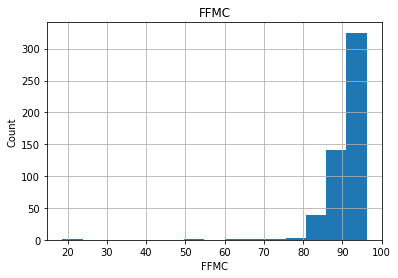

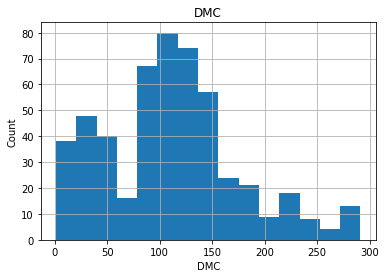

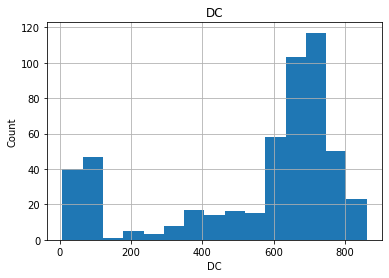

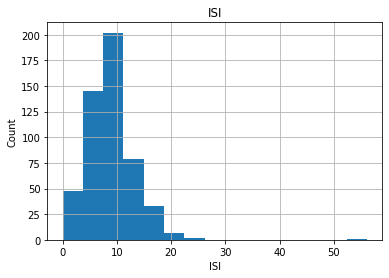

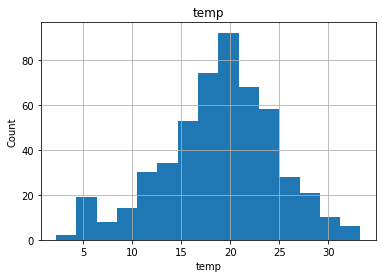

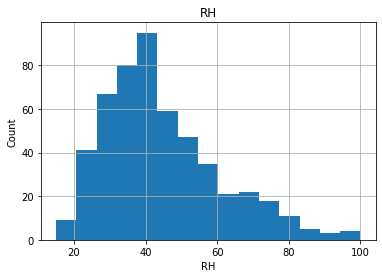

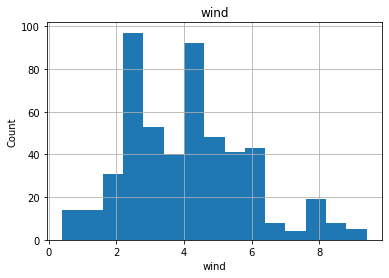

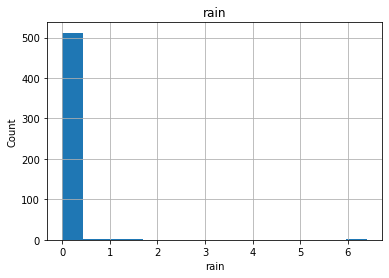

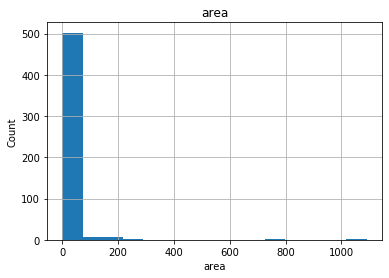

In [19]:
for feature in num_values.columns:
    data = num_values.copy()
    data[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### All the columns are not normally distributed

In [20]:
# Checking the outliers by using boxplots

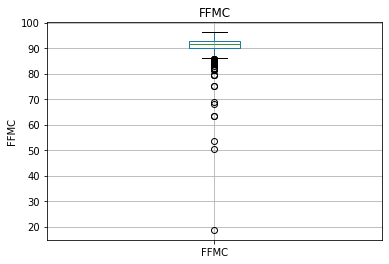

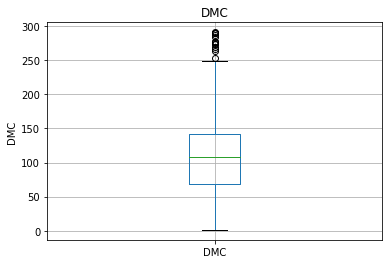

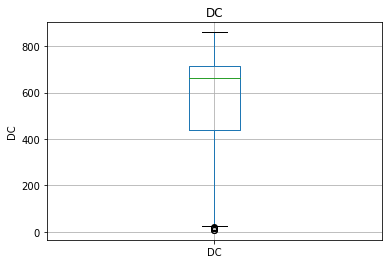

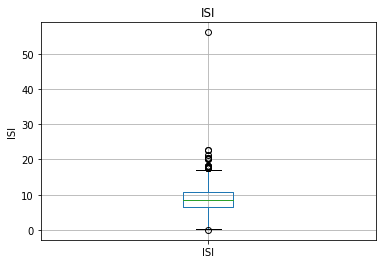

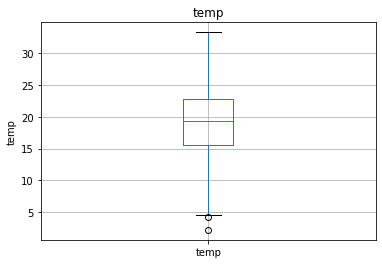

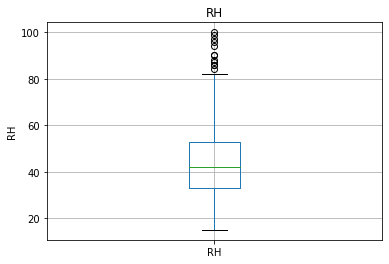

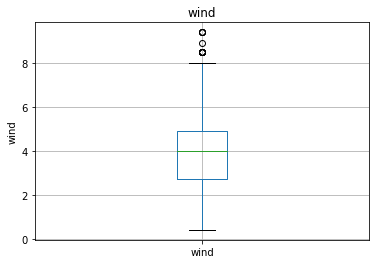

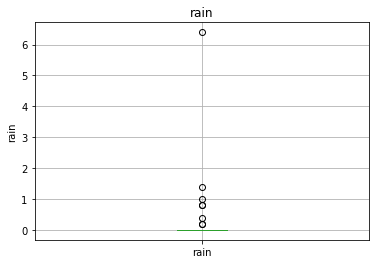

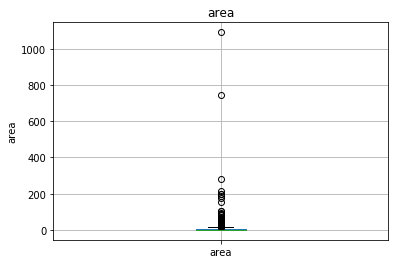

In [22]:
for feature in num_values.columns:
    data = num_values.copy()
    num_values.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Many variables consists of lot of outliers especially "area"

### Bivariate analysis

In [23]:
# Scatter plots of input feature with output feature

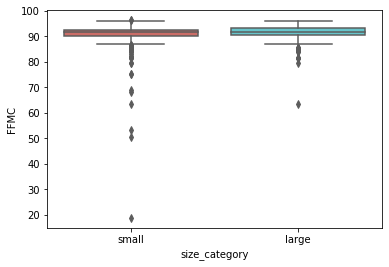

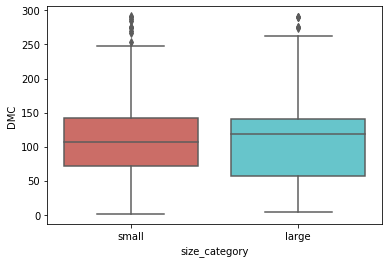

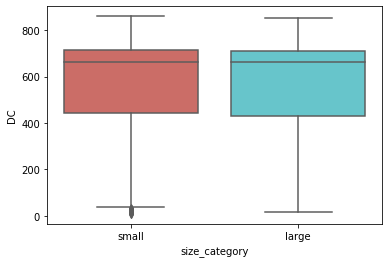

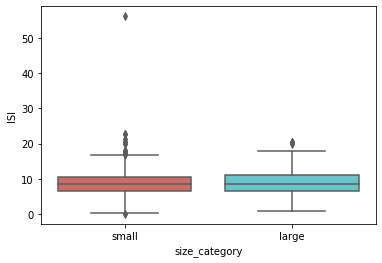

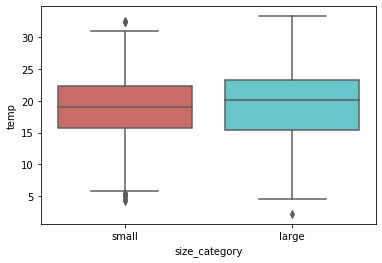

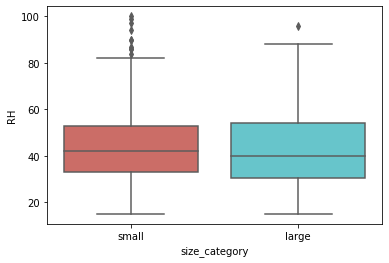

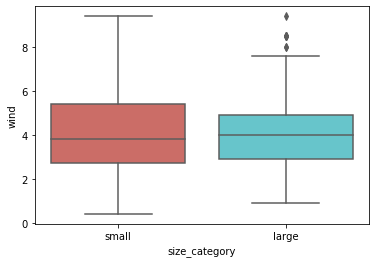

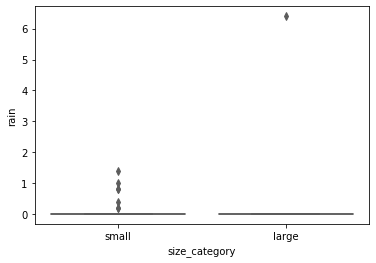

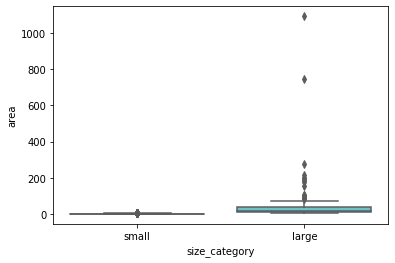

In [24]:
for feature in num_values:
    sns.boxplot("size_category",feature, data=fire, palette='hls')
    plt.show()

#### There is no considerable changes in the two categories of output variables with input variables

In [ ]:
# Count plot of target variable

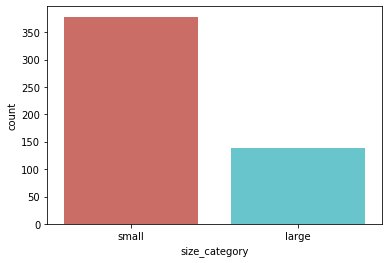

In [25]:
 sns.countplot("size_category", data=fire , palette='hls')

In [9]:
fire["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

#### Dataset consists of more "small" category values compared to "large"

### Correlation matrix

In [28]:
fire.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


#### The input variables "DMC" and "DC" have higher correlation among all the variables

#### The date and month dummy variable columns hardl have any influence on the size of the fire, hence dropping these columns

In [26]:
# Splitting the data into input and output variables

In [30]:
X = fire[num_values.columns]
Y = fire["size_category"]

## Feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler()

In [35]:
X = scaler.transform(X)

In [37]:
# Splitting the data into train and test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25)

In [40]:
x_train.shape, x_test.shape

((387, 9), (130, 9))

## Model building

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(60,30), random_state=1)

In [43]:
mlp.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(60, 30), random_state=1)

In [44]:
# predcited values

In [45]:
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

In [46]:
# Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
confusion_matrix(y_train, pred_train)

array([[ 89,   4],
       [  0, 294]], dtype=int64)

In [49]:
confusion_matrix(y_test, pred_test)

array([[38,  8],
       [ 1, 83]], dtype=int64)

In [51]:
# Checking the accuracy

In [52]:
accuracy_score(y_train, pred_train)

0.9896640826873385

In [53]:
accuracy_score(y_test, pred_test)

0.9307692307692308

#### The obtained accuracy is good, but tuning hyper parameters to improve accuracy

In [87]:
mlp = MLPClassifier(hidden_layer_sizes=(60,30), max_iter=500, learning_rate="adaptive", random_state=1)

In [88]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 30), learning_rate='adaptive',
              max_iter=500, random_state=1)

In [89]:
# predcited values

In [90]:
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

In [91]:
# Confusion matrix

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [93]:
confusion_matrix(y_train, pred_train)

array([[ 93,   0],
       [  0, 294]], dtype=int64)

In [94]:
confusion_matrix(y_test, pred_test)

array([[40,  6],
       [ 0, 84]], dtype=int64)

In [95]:
# Checking the accuracy

In [96]:
accuracy_score(y_train, pred_train)

1.0

In [97]:
accuracy_score(y_test, pred_test)

0.9538461538461539

#### The accuracy has been improved to 95.3 % from 93.07%
#### The tuned hyper parameters are learning_rate="adaptive", max_iter=500 and the hidden layers are two with 60 and 30 neurons in each layer respectively